AAAA   1- Extract the month and year separately.


In [1]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")

In [2]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month_name()
print(df[['date_added', 'month_added']].head()) 

  date_added month_added
0 2021-09-25   September
1 2021-09-24   September
2 2021-09-24   September
3 2021-09-24   September
4 2021-09-24   September


C:\Users\AR Store\AppData\Local\Temp\ipykernel_5428\2252343132.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


2-Identify which month (across all years) Netflix typically adds the most new content.

In [3]:
month_counts = df['month_added'].value_counts()
print(month_counts)
print("Most active month:", month_counts.idxmax())

month_added
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: count, dtype: int64
Most active month: July


3- Plot the total number of titles added per month.

In [4]:
month_counts = df['month_added'].value_counts().sort_index()

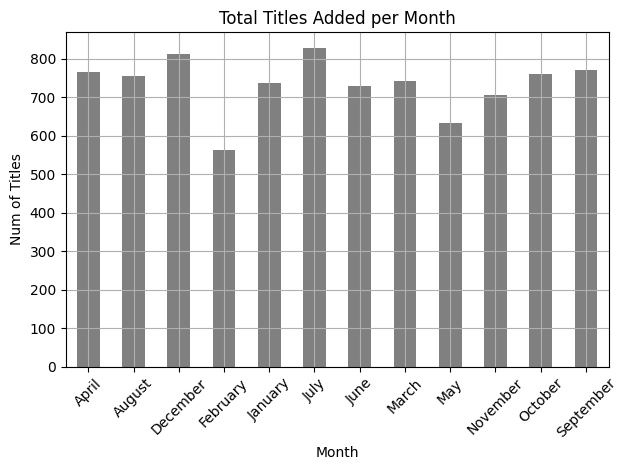

In [5]:
import matplotlib.pyplot as plt

month_counts.plot(kind='bar', color='grey')  
plt.title('Total Titles Added per Month')
plt.xlabel('Month')
plt.ylabel('Num of Titles')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()  
plt.show()

BBBB   - Identify any titles that appear more than once, regardless of country.

Step 1: get duplicated titles

In [6]:
duplicate_titles = df[df.duplicated('title', keep=False)]

Step 2: show title + country + rating for duplicates

In [7]:
result = duplicate_titles[['title', 'country', 'rating']].sort_values('title')
print(result)

       title                         country rating
3962  15-Aug                           India  TV-14
5966  15-Aug                           India  TV-14
4522  22-Jul  Norway, Iceland, United States      R
5965  22-Jul  Norway, Iceland, United States      R
3996   9-Feb                             NaN  TV-14
5964   9-Feb                             NaN  TV-14
